In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Figures inline and set visualization style
%matplotlib inline
# sns.set()


In [2]:
# Import data
df_train = pd.read_csv('/home/gajendra/Github/MachineLearning_intro/Titanic_data/train.csv')
df_test = pd.read_csv('/home/gajendra/Github/MachineLearning_intro/Titanic_data/test.csv')

In [22]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


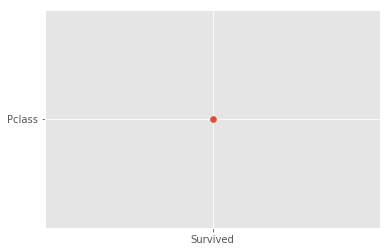

In [29]:
# df_test.info()
import matplotlib
matplotlib.style.use('ggplot')
plt.scatter(['Survived'], ['Pclass'])
plt.show()

In [30]:
# Store target variable of training data in a safe place
survived_train = df_train.Survived

# Concatenate training and test sets
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

# data.info()
data.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.088767
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.267793
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.114133
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.031548
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.320575
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.014893
Survived,-0.088767,0.267793,0.114133,-0.031548,-0.320575,-0.014893,1.000000


In [4]:
# Impute missing numerical variables
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())

# Check out info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [5]:
data=data.drop("Cabin", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


In [6]:
object_columns_df = data.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])


Name        Braund, Mr. Owen Harris
Sex                            male
Ticket                    A/5 21171
Embarked                          S
Name: 0, dtype: object


In [7]:
object_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 4 columns):
Name        1309 non-null object
Sex         1309 non-null object
Ticket      1309 non-null object
Embarked    1307 non-null object
dtypes: object(4)
memory usage: 51.1+ KB


In [8]:
cols = ['Name', 'Sex','Ticket', 'Embarked']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

Name :
Kelly, Mr. James                                       2
Connolly, Miss. Kate                                   2
Humblen, Mr. Adolf Mathias Nicolai Olsen               1
Johnson, Mr. Alfred                                    1
Beauchamp, Mr. Henry James                             1
Ilett, Miss. Bertha                                    1
Eitemiller, Mr. George Floyd                           1
Lesurer, Mr. Gustave J                                 1
Slayter, Miss. Hilda Mary                              1
Toomey, Miss. Ellen                                    1
Hansen, Mr. Henrik Juul                                1
Hart, Mr. Henry                                        1
Hickman, Mr. Leonard Mark                              1
Andersson, Mr. August Edvard ("Wennerstrom")           1
Hocking, Miss. Ellen Nellie""                          1
Davidson, Mrs. Thornton (Orian Hays)                   1
Mitkoff, Mr. Mito                                      1
Zabour, Miss. Hileni    

In [9]:
drop_cols=['Name', 'Ticket']
data=data.drop(drop_cols, axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


In [10]:
nominal_columns = ["Embarked", "Sex"]
dummy_df = pd.get_dummies(data[nominal_columns])
data = pd.concat([data, dummy_df], axis=1)
data = data.drop(nominal_columns, axis=1)

In [11]:
data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,3,35.0,0,0,8.0500,0,0,1,0,1


In [21]:
data.corr()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_male
Pclass,1.000000,-0.377908,0.060832,0.018322,-0.558683,-0.269658,0.230491,0.096335,0.124617
Age,-0.377908,1.000000,-0.189972,-0.125851,0.178182,0.075016,-0.031132,-0.051625,0.053663
SibSp,0.060832,-0.189972,1.000000,0.373587,0.160349,-0.048396,-0.048678,0.075198,-0.109609
Parch,0.018322,-0.125851,0.373587,1.000000,0.221635,-0.008635,-0.100943,0.073258,-0.213125
Fare,-0.558683,0.178182,0.160349,0.221635,1.000000,0.286368,-0.129958,-0.172829,-0.185681
Embarked_C,-0.269658,0.075016,-0.048396,-0.008635,0.286368,1.000000,-0.164166,-0.775441,-0.066564
Embarked_Q,0.230491,-0.031132,-0.048678,-0.100943,-0.129958,-0.164166,1.000000,-0.489874,-0.088651
Embarked_S,0.096335,-0.051625,0.075198,0.073258,-0.172829,-0.775441,-0.489874,1.000000,0.119504
Sex_male,0.124617,0.053663,-0.109609,-0.213125,-0.185681,-0.066564,-0.088651,0.119504,1.000000


In [12]:
data=data.drop(['Sex_female'], axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Embarked_C     1309 non-null uint8
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
Sex_male       1309 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 76.7 KB


In [13]:
for name in data:
    print(name,':')
    print(data[name].value_counts(),'\n')

PassengerId :
1309    1
449     1
431     1
432     1
433     1
434     1
435     1
436     1
437     1
438     1
439     1
440     1
441     1
442     1
443     1
444     1
445     1
446     1
447     1
430     1
429     1
428     1
418     1
411     1
412     1
413     1
414     1
415     1
416     1
417     1
       ..
890     1
880     1
891     1
892     1
893     1
894     1
895     1
896     1
897     1
881     1
879     1
861     1
869     1
862     1
863     1
864     1
865     1
866     1
867     1
868     1
870     1
878     1
871     1
872     1
873     1
874     1
875     1
876     1
877     1
1       1
Name: PassengerId, Length: 1309, dtype: int64 

Pclass :
3    709
1    323
2    277
Name: Pclass, dtype: int64 

Age :
28.00    295
24.00     47
22.00     43
21.00     41
30.00     40
18.00     39
25.00     34
36.00     31
26.00     30
29.00     30
27.00     30
19.00     29
23.00     26
32.00     24
20.00     23
35.00     23
31.00     23
33.00     21
45.00     21
17.00     

In [14]:
data=data.drop(['PassengerId'], axis=1)

In [15]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,3,22.0,1,0,7.2500,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,0
4,3,35.0,0,0,8.0500,0,0,1,1


In [16]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]

In [17]:
X = data_train.values
test = data_test.values
y = survived_train.values

In [23]:
# Instantiate model and fit to data
# clf = tree.DecisionTreeClassifier(max_depth=3)
# clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
# clf=RandomForestRegressor(random_state=1)
# clf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [18]:
clf=RandomForestClassifier(random_state=1)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [19]:
# Make predictions and store in 'Survived' column of df_test
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred
df_test['Survived']

0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     1
18     0
19     0
20     0
21     1
22     1
23     1
24     1
25     0
26     1
27     1
28     0
29     0
      ..
388    0
389    0
390    0
391    1
392    0
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    0
404    0
405    0
406    0
407    0
408    1
409    1
410    1
411    1
412    0
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [69]:
# This block is used to convert float values of RFR to binary values with 0.5 as threshold.
# val=float(val)
# for val in range(df_test['Survived'].count()):
#     if df_test['Survived'][val]>0.5000000:
#         df_test['Survived'][val]=1
#     else:
#         df_test['Survived'][val]=0
# df_test['Survived']=df_test['Survived'].astype(int, inplace=True)
# df_test['Survived']

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0      0
1      0
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     0
20     0
21     1
22     1
23     0
24     1
25     0
26     1
27     1
28     1
29     0
      ..
388    0
389    0
390    0
391    1
392    0
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    0
404    0
405    1
406    0
407    0
408    1
409    1
410    1
411    1
412    0
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [59]:
type(val)

float

In [20]:
df_test[['PassengerId', 'Survived']].to_csv('/home/gajendra/Github/MachineLearning_intro/Titanic_data/predictions/5th_solution.csv', index=False)